#### 1. Dataframe basics

#### 1.1. Import pandas and reffered the package as pd + Load "telecom_churn.csv" and assign in to the variable df <span style= color:#0033cc>(3 points)</span>

In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
df = pd.read_csv('telecom_churn.csv')
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


#### 1.2 Return the column labels/names <span style= color:#0033cc>(2 points)</span>

In [3]:
res = df.columns.tolist()
res

['State',
 'Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

#### 1.3 Print the df shape <span style= color:#0033cc>(3 points)</span>

In [11]:
df.shape

(3333, 20)

#### 2. What is the total day calls given by state and area code? 

In [12]:
sumCealls = df.groupby( ['State','Area code'])['Total intl calls'].sum()
sumCealls

State  Area code
AK     408           58
       415          119
       510           73
AL     408          109
       415          194
                   ... 
WV     415          242
       510          138
WY     408           95
       415          185
       510          103
Name: Total intl calls, Length: 153, dtype: int64

#### 2.1 Group the df by state and area code (assign it to grouped variable). <span style= color:#0033cc>(5 points)</span>

In [13]:
group_data = df.groupby( ['State','Area code'])
group_data

#### 2.2 Use agg with the desired function sum to get the final answer (assign it to telecom_agg variable).<span style= color:#0033cc>(5 points)</span>

In [5]:
telecom_agg = df.groupby( ['State','Area code']).agg({'Total day calls': 'sum'})
telecom_agg

Total day calls
State Area code                 
AK    408                   1342
      415                   2357
      510                   1255
AL    408                   2524
      415                   4090
...                          ...
WV    415                   5474
      510                   3491
WY    408                   1659
      415                   4205
      510                   2007

[153 rows x 1 columns]

#### 2.3 Reset the group by index <span style= color:#0033cc>(3 points)</span>

In [4]:
telecom_agg_index = df.groupby( ['State','Area code']).agg({'Total day calls': 'sum'}).reset_index()
telecom_agg_index

,State,Area code,Total day calls
0,AK,408,1342
1,AK,415,2357
2,AK,510,1255
3,AL,408,2524
4,AL,415,4090
...,...,...,...
148,WV,415,5474
149,WV,510,3491
150,WY,408,1659
151,WY,415,4205


#### 2.4 Use head function to review the first 10 telecom_agg rows <span style= color:#0033cc>(3 points)</span>

In [11]:
head_10 = telecom_agg.head(10)
head_10

,State,Area code,Total day calls
0,AK,408,1342
1,AK,415,2357
2,AK,510,1255
3,AL,408,2524
4,AL,415,4090
5,AL,510,1314
6,AR,408,1382
7,AR,415,2756
8,AR,510,1480
9,AZ,408,1452


#### 3. Users Churn rate

#### 3.1 Change "Churn" column type to an integer: <span style= color:#0033cc>(3 points)</span>

In [22]:
df['Churn'] = df['Churn'].astype(int)
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


#### 3.2 what is the users "churn rate" in our dataframe? <span style= color:#0033cc>(5 points)</span>
Hint: the churn rate formula can be calculated as the "number of churned" divided by the "total number of customers".

In [23]:
number_of_churned = df['Churn'].sum()
total_customers = df['Churn'].count()
churn_rate = (number_of_churned / total_customers)*100
f"Churn Rate: {churn_rate:.2f}%"


'Churn Rate: 14.49%'

#### 3.3  How the charn rate can affect on the company? <span style= color:#0033cc>(3 points)</span>

In [27]:
churned = df[df['Churn'] == 1]
not_churned = df[df['Churn'] == 0]
# השוואת ממוצעים לדוגמה
print("Average day minutes:")
print("Churned:", churned['Total day minutes'].mean())
print("Not churned:", not_churned['Total day minutes'].mean())

print("\nAverage number of customer service calls:")
print("Churned:", churned['Customer service calls'].mean())
print("Not churned:", not_churned['Customer service calls'].mean())

Average day minutes:
Churned: 206.91407867494823
Not churned: 175.1757543859649

Average number of customer service calls:
Churned: 2.229813664596273
Not churned: 1.4498245614035088


#### 3.4 How much time (on average) do churned users spend on the phone during daytime? <span style= color:#0033cc>(5 points)</span>
Hint: filter churn column when the value of churn equal to 1

In [43]:
average_daytime_usage= churned['Total day minutes'].mean()
average_daytime_usage

np.float64(206.91407867494823)

#### 3.5 What is the maximum length of international calls among loyal users who do not have an international plan? ('International plan' == 'No') <span style= color:#0033cc>(5 points)</span>
Hint: 2 filters conditions,churn equal to 0 and international plan equal to no

In [54]:
not_churned_withot_international_plan = not_churned[not_churned['International plan']=='No']
# not_churned_withot_international_plan

print(not_churned_withot_international_plan['Total intl calls'].max())

19


#### 4. Select top 3 international plan subscribers and non subscribers with the most intl calls

#### 4.1. Build a function top which attributes df, n (for the top n) and column. In this function use sort_values to sort the values in the column specified. <span style= color:#0033cc>(10 points)</span>
Note: Do not apply the function on the whole data frame (e.i. top(df, n=3)) as the output will be the top 3 regardless of subscribers and non-subscribers.

In [68]:
def top(df, n, column):
    return df.sort_values(by=column, ascending=False).head(n)

#### 4.2. Group the df dataframe by 'International plan' and use apply(top) to apply this function. <span style= color:#0033cc>(5 points)</span>

In [74]:
df.groupby('International plan').apply(lambda group: top(group, 3, 'Total intl calls'))

C:\Users\user1\AppData\Local\Temp\ipykernel_28676\2630849889.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('International plan').apply(lambda group: top(group, 3, 'Total intl calls'))


State  Account length  Area code International plan  \
International plan                                                            
No                 22      AZ             130        415                 No   
                   982     ND              84        415                 No   
                   377     ND              79        408                 No   
Yes                3291    MI             119        510                Yes   
                   957     NV             144        415                Yes   
                   41      MD             135        408                Yes   

                        Voice mail plan  Number vmail messages  \
International plan                                               
No                 22                No                      0   
                   982              Yes                     33   
                   377               No                      0   
Yes                3291             Yes                     22   
                   957               No                      0   
                   41               Yes                     41   

                         Total day minutes  Total day calls  Total day charge  \
International plan                                                              
No                 22                183.0              112             31.11   
                   982               159.1              106             27.05   
                   377               205.7              123             34.97   
Yes                3291              172.1              119             29.26   
                   957               150.0               69             25.50   
                   41                173.1               85             29.43   

                         Total eve minutes  Total eve calls  Total eve charge  \
International plan                                                              
No                 22                 72.9               99              6.20   
                   982               149.8              101             12.73   
                   377               214.5              108             18.23   
Yes                3291              223.6              133             19.01   
                   957               285.9               73             24.30   
                   41                203.9              107             17.33   

                         Total night minutes  Total night calls  \
International plan                                                
No                 22                  181.8                 78   
                   982                 213.4                108   
                   377                 226.1                106   
Yes                3291                150.0                 94   
                   957                 190.6                121   
                   41                  122.2                 78   

                         Total night charge  Total intl minutes  \
International plan                                                
No                 22                  8.18                 9.5   
                   982                 9.60                13.0   
                   377                10.17                 6.7   
Yes                3291                6.75                13.9   
                   957                 8.58                 9.4   
                   41                  5.50                14.6   

                         Total intl calls  Total intl charge  \
International plan                                             
No                 22                  19               2.57   
                   982                 18               3.51   
                   377                 18               1.81   
Yes                3291                20               3.75   
                   957                 15               2.54   
                   41                  15 

#### 5. pd.crosstab

#### 5.1 how the observations in our sample are normalized (divide each value by the sum of the values) in the context of two variables - Churn and Voice mail plan. To do so, build a contingency table using the crosstab method. <span style= color:#0033cc>(6 points)</span>
Hint: To normalize using all values, simply set normalize=True

In [79]:
table = pd.crosstab(df['Churn'], df['Voice mail plan'], normalize='all')
table

Voice mail plan,No,Yes
Churn,,
0,0.602460,0.252625
1,0.120912,0.024002


#### 5.2 What is the conclustion of most of users regarding voice mail usage? <span style= color:#0033cc>(4 points)</span>

In [80]:
conclustion = df['Voice mail plan'].value_counts(normalize=True)
conclustion

Voice mail plan
No     0.723372
Yes    0.276628
Name: proportion, dtype: float64

#### 6. Columns calculations


#### 6.1 Add a column name 'total_charge', and get the total charge by sum all the charge columns <span style= color:#0033cc>(7 points)</span>

In [84]:
df['total_charge'] = df[['Total night charge','Total day charge','Total intl charge']].sum(axis=1)
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,58.78
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,42.62
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,51.99
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,61.54
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,39.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,...,18.32,279.1,83,12.56,9.9,6,2.67,2,0,41.78
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,...,13.04,191.3,123,8.61,9.6,4,2.59,3,0,50.49
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,...,24.55,191.9,91,8.64,14.1,6,3.81,2,0,43.19
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,...,13.57,139.2,137,6.26,5.0,10,1.35,2,0,43.96


####  6.2 Add a column name 'Day_charge_pct', and get day charge precentage of total charge by dividing the column 'Total day charge' by the column 'total_charge'. <span style= color:#0033cc>(7 points)</span>

In [88]:
df[ 'Day_charge_pct'] = (df['Total day charge']/df['total_charge'])
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_charge,Day_charge_pct
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,58.78,0.766757
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,42.62,0.644533
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,51.99,0.795922
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,61.54,0.827104
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,39.48,0.717832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,...,279.1,83,12.56,9.9,6,2.67,2,0,41.78,0.635472
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,...,191.3,123,8.61,9.6,4,2.59,3,0,50.49,0.778174
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,...,191.9,91,8.64,14.1,6,3.81,2,0,43.19,0.711739
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,...,139.2,137,6.26,5.0,10,1.35,2,0,43.96,0.826888


#### 7. Day charge percentage and state visualization

#### 7.1 Import matplotlib.pyplot and referred the package as plt <span style= color:#0033cc>(2 points)</span>

In [ ]:
pip install matplotlib pandas
import matplotlib.pyplot as plt


#### 7.2 create new string list with the name 'my_color' that contains the following colors names: red,green,orange,blue,yellow <span style= color:#0033cc>(4 points)</span>

In [99]:
my_color = ['red', 'green', 'orange', 'blue', 'yellow']
my_color

['red', 'green', 'orange', 'blue', 'yellow']

#### 7.3 Bar chart plot <span style= color:#0033cc>(10 points)</span>

1.Select first 5 rows of the dataframe (use df.iloc[]) 

2.Use <span style= color:blue>df.plot</span> function with kind='bar' and x='State' and y='Day_charge_pct' and color = my_colors to make a simple bar chart plot (of the day chart %).

3.Use <span style= color:blue>plt.xlabel("State Code")</span> and <span style= color:blue>plt.ylabel("Day Charge %")</span> to label the corresponding axes

In [103]:
first_five_rows = df.iloc[:5]
first_five_rows

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_charge,Day_charge_pct
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,58.78,0.766757
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,42.62,0.644533
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,51.99,0.795922
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,61.54,0.827104
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,39.48,0.717832


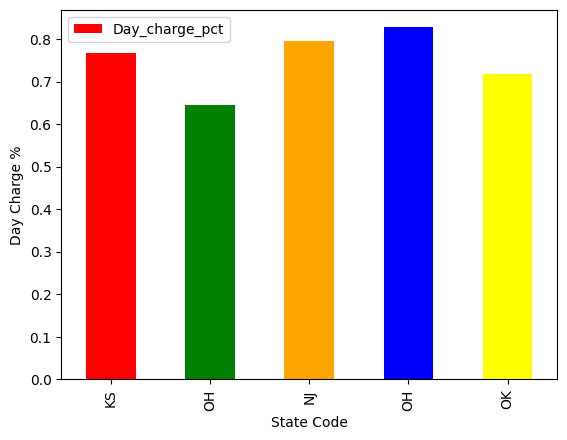

In [104]:
first_five_rows.plot(kind='bar', x='State', y='Day_charge_pct', color=my_color)
plt.xlabel("State Code")
plt.ylabel("Day Charge %")
plt.show()
